## Índices Mundiais

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

tickers = {'IBOV': '^BVSP', 'SP500': '^GSPC', 'Nasdaq': '^IXIC',
           'DAX': '^GDAXI', 'DowJones': '^DJI', 'India': '^BSESN',
           'Japao':'^N225'}

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Gerando um CSV a partir dos tickers acima

In [2]:
for k, v in tickers.items():
    df = web.DataReader(v, ds_yahoo, start, end)
    df.to_csv('csv/{}.csv'.format(k))

## Lendo os CSVs

In [3]:
ibov_df = pd.read_csv('csv/IBOV.csv', index_col=0)
sp500_df = pd.read_csv('csv/SP500.csv', index_col=0)
nasdaq_df = pd.read_csv('csv/Nasdaq.csv', index_col=0)
dax_df = pd.read_csv('csv/DAX.csv', index_col=0)
dji_df = pd.read_csv('csv/DowJones.csv', index_col=0)
india_df = pd.read_csv('csv/India.csv', index_col=0)
japao_df = pd.read_csv('csv/Japao.csv', index_col=0)

## Gerando um CSV com a coluna de Fechamento Ajustado de todos os índices

In [4]:
data = pd.DataFrame()

for k, v in tickers.items():
    data[k] = web.DataReader(v, ds_yahoo, start, end)['Adj Close']

data.to_csv('csv/indices_adj_close.csv')
all_index_adj_close_df = pd.read_csv('csv/indices_adj_close.csv', index_col=0)

## Gráfico do rendimento dos índices normalizados

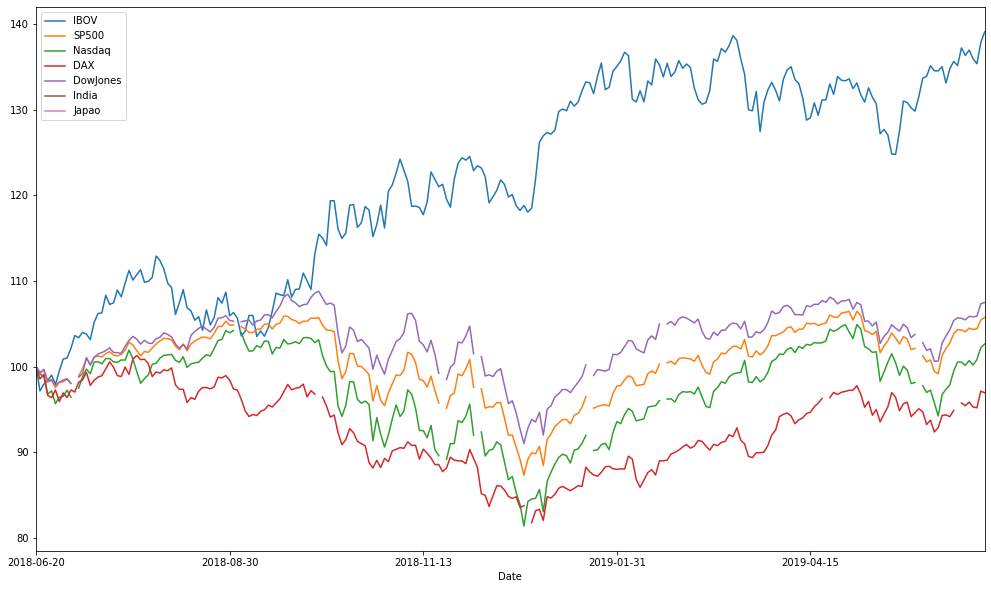

In [5]:
df_normalizado = all_index_adj_close_df / all_index_adj_close_df.iloc[0] * 100
df_normalizado.plot(figsize=(17,10));

## Apenas índices estrangeiros

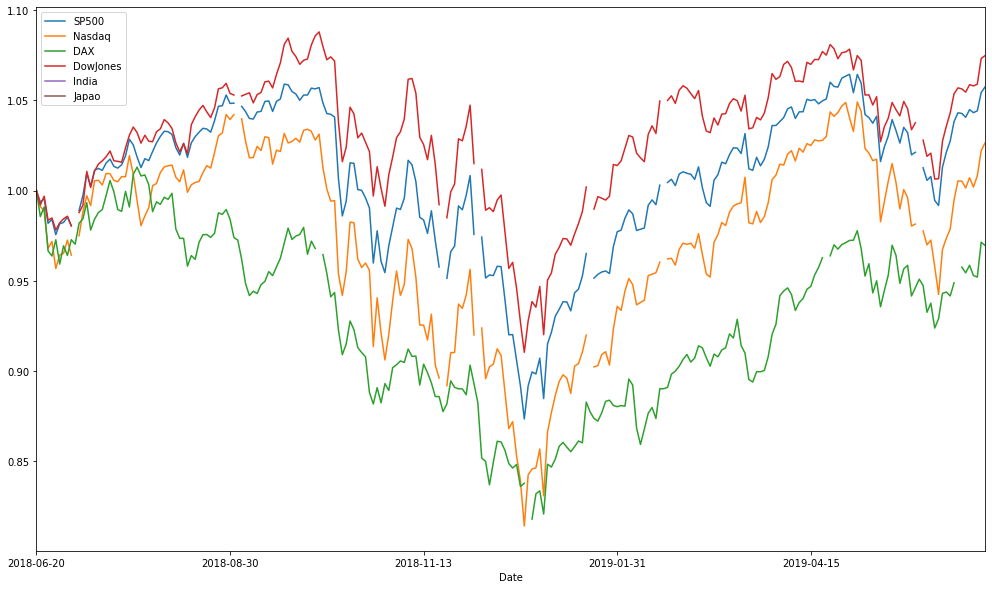

In [6]:
todos_indices_sem_ibov = all_index_adj_close_df.drop(labels='IBOV', axis=1, inplace=False)

(todos_indices_sem_ibov / todos_indices_sem_ibov.iloc[0]).plot(figsize=(17,10));

## Média anual de retorno dos índices

In [7]:
index_returns = (all_index_adj_close_df / all_index_adj_close_df.shift(1)) - 1
annual_ind_returns = index_returns.mean() * 250 # média de pregões no ano
round(annual_ind_returns * 100, 3)

IBOV        36.009
SP500        9.566
Nasdaq       6.210
DAX         -0.296
DowJones    11.638
India       17.587
Japao       -6.516
dtype: float64

## Média anual de retorno apenas do IBOV

In [8]:
ibov_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2018-06-20 to 2019-06-19
Data columns (total 6 columns):
High         246 non-null int64
Low          246 non-null int64
Open         246 non-null int64
Close        246 non-null int64
Volume       246 non-null int64
Adj Close    246 non-null int64
dtypes: int64(6)
memory usage: 13.5+ KB


In [9]:
ibov_adj_close = all_index_adj_close_df.get('IBOV')
ibov_return = (ibov_adj_close / ibov_adj_close.shift(1)) - 1
annual_ibov_return = ibov_return.mean() * 246
round(annual_ibov_return * 100, 3)

35.433

## Correlação entre índices

In [17]:
import numpy as np
import seaborn as sns

In [18]:
log_returns = np.log(all_index_adj_close_df / all_index_adj_close_df.shift(1))
corr_index = log_returns.corr()

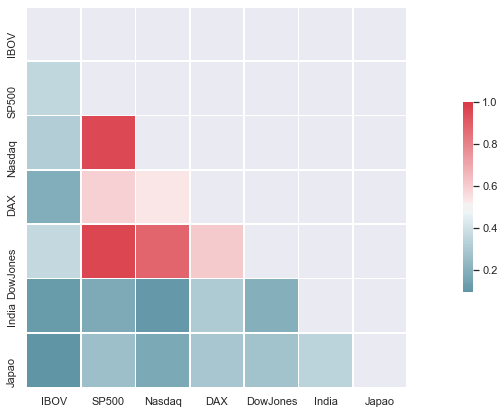

In [19]:
sns.set()

f, ax = plt.subplots(figsize=(20, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr_index, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_index, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [16]:
corr_index

,IBOV,SP500,Nasdaq,DAX,DowJones,India,Japao
IBOV,1.000000,0.356566,0.321722,0.187571,0.362690,0.122826,0.092376
SP500,0.356566,1.000000,0.956712,0.588896,0.964787,0.175662,0.261387
Nasdaq,0.321722,0.956712,1.000000,0.535536,0.881396,0.106879,0.170935
DAX,0.187571,0.588896,0.535536,1.000000,0.606711,0.307483,0.289502
DowJones,0.362690,0.964787,0.881396,0.606711,1.000000,0.197560,0.274837
India,0.122826,0.175662,0.106879,0.307483,0.197560,1.000000,0.342189
Japao,0.092376,0.261387,0.170935,0.289502,0.274837,0.342189,1.000000
